Interpolation is a technique used to estimate missing data points within a range of known data points. Pandas provides a powerful interpolate() method that supports multiple interpolation methods. Each method is suited to different scenarios based on the nature of the data and the relationship between data points.



#Types of Interpolation

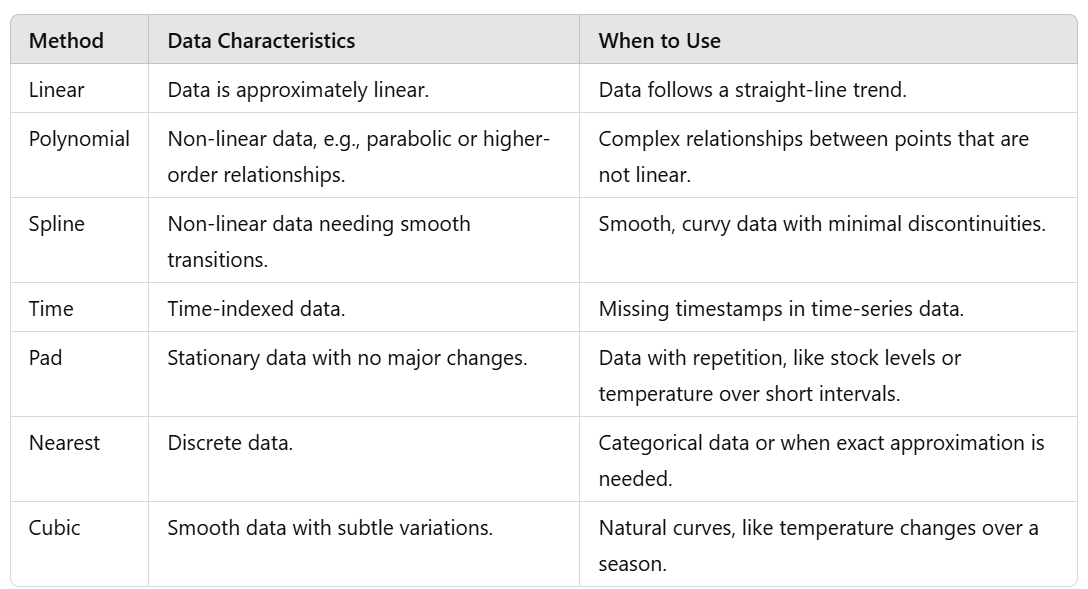

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:

# Create a synthetic dataset with missing values
data = {
    'Day': [1, 2, 3, 4, 5, 6, 7],
    'Temperature': [30, 32, np.nan, 35, np.nan, 38, 40],
    'Humidity': [45, np.nan, 50, 55, np.nan, 60, 65]
}
df = pd.DataFrame(data)
print("Original Dataset:")
display(df)


Original Dataset:


,Day,Temperature,Humidity
0,1,30.0,45.0
1,2,32.0,NaN
2,3,NaN,50.0
3,4,35.0,55.0
4,5,NaN,NaN
5,6,38.0,60.0
6,7,40.0,65.0


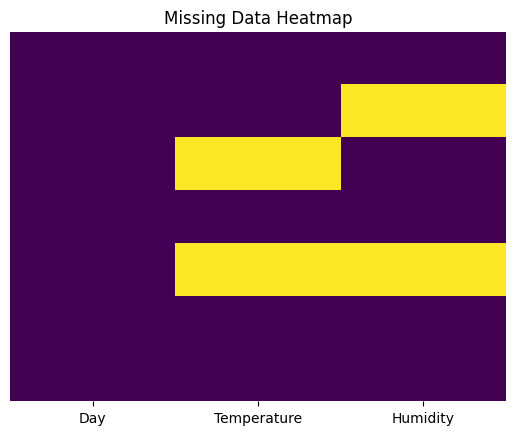

In [ ]:

# Visualize missing values using seaborn heatmap
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title("Missing Data Heatmap")
plt.show()


#### 1. **Linear Interpolation**
   - **What it does**: Connects two data points with a straight line and fills missing values along this line.
   - **Use case**: When data is roughly linear and smooth between points.
   - **Syntax**: `df['column'].interpolate(method='linear')`

In [ ]:

# Perform linear interpolation
df_linear = df.copy()
df_linear['Temperature'] = df_linear['Temperature'].interpolate(method='linear')
df_linear['Humidity'] = df_linear['Humidity'].interpolate(method='linear')

print("Dataset after Linear Interpolation:")
display(df_linear)
display(df)

Dataset after Linear Interpolation:


,Day,Temperature,Humidity
0,1,30.0,45.0
1,2,32.0,47.5
2,3,33.5,50.0
3,4,35.0,55.0
4,5,36.5,57.5
5,6,38.0,60.0
6,7,40.0,65.0


,Day,Temperature,Humidity
0,1,30.0,45.0
1,2,32.0,NaN
2,3,NaN,50.0
3,4,35.0,55.0
4,5,NaN,NaN
5,6,38.0,60.0
6,7,40.0,65.0


#### 2. **Polynomial Interpolation**
   - **What it does**: Fits a polynomial of a specified degree (order) to the data points and estimates missing values.
   - **Use case**: When the data has a non-linear relationship, such as parabolic or sinusoidal trends.
   - **Syntax**: `df['column'].interpolate(method='polynomial', order=2)`

#### **What It Does**
Polynomial interpolation fits a polynomial of a specified **degree (order)** to the data points. It estimates the missing values by evaluating the polynomial function at the positions of the missing data. This method is particularly useful for capturing **nonlinear trends** in datasets, such as parabolic, sinusoidal, or exponential patterns.

---

### **Key Features**
1. **Flexible Degree**:
   - The degree of the polynomial can be specified using the `order` parameter.
   - For example:
     - `order=1`: Linear interpolation (straight lines).
     - `order=2`: Quadratic interpolation (parabolas).
     - `order=3`: Cubic interpolation (curved polynomials).
   
2. **Use Case**:
   - Suitable for datasets with known underlying trends or patterns that can be modeled using polynomials, such as:
     - Temperature variations (parabolic).
     - Growth patterns (exponential).
     - Oscillations (sinusoidal).

### **How Polynomial Interpolation Works**
1. **Modeling the Curve**:
   - Polynomial interpolation computes coefficients $( a, b, c, \ldots )$ for the polynomial:
     
     $$
     P(x) = ax^n + bx^{n-1} + \ldots + z
     $$
        - \( n \) is the degree specified by the `order` parameter.
   
2. **Estimating Missing Values**:
   - The polynomial is used to predict the values of missing data points.

### **Syntax**
```python
df['column'].interpolate(method='polynomial', order=n)
```
- `method='polynomial'`: Specifies polynomial interpolation.
- `order=n`: Degree of the polynomial to fit the data points.

In [ ]:

# Perform polynomial interpolation of order 2
df_poly = df.copy()
df_poly['Temperature'] = df_poly['Temperature'].interpolate(method='polynomial', order=3)
df_poly['Humidity'] = df_poly['Humidity'].interpolate(method='polynomial', order=2)

print("Dataset after Polynomial Interpolation (Order 2):")
display(df_poly)
display(df)

Dataset after Polynomial Interpolation (Order 2):


,Day,Temperature,Humidity
0,1,30.0,45.000000
1,2,32.0,46.452991
2,3,33.6,50.000000
3,4,35.0,55.000000
4,5,36.4,57.606838
5,6,38.0,60.000000
6,7,40.0,65.000000


,Day,Temperature,Humidity
0,1,30.0,45.0
1,2,32.0,NaN
2,3,NaN,50.0
3,4,35.0,55.0
4,5,NaN,NaN
5,6,38.0,60.0
6,7,40.0,65.0


#### 3. **Spline Interpolation**
   - **What it does**: Fits a smooth spline (a piecewise polynomial) to the data.
   - **Use case**: When a smooth curve between points is needed and higher accuracy is required.
   - **Syntax**: `df['column'].interpolate(method='spline', order=3)`

In [ ]:
# Spline Interpolation
df_spline = df.copy()
df_spline['Temperature'] = df_spline['Temperature'].interpolate(method='spline', order=3)
df_spline['Humidity'] = df_spline['Humidity'].interpolate(method='spline', order=3)

print("Spline Interpolation:")
display(df_spline)
display(df)

Spline Interpolation:


,Day,Temperature,Humidity
0,1,30.0,45.000000
1,2,32.0,47.894737
2,3,33.6,50.000000
3,4,35.0,55.000000
4,5,36.4,57.105263
5,6,38.0,60.000000
6,7,40.0,65.000000


,Day,Temperature,Humidity
0,1,30.0,45.0
1,2,32.0,NaN
2,3,NaN,50.0
3,4,35.0,55.0
4,5,NaN,NaN
5,6,38.0,60.0
6,7,40.0,65.0


#### 4. **Time Interpolation**
   - **What it does**: Performs interpolation based on time indices.
   - **Use case**: When data is time-series based, with evenly or unevenly spaced time points.
   - **Syntax**: `df['column'].interpolate(method='time')`

In [ ]:
# Time interpolation
df_time = pd.DataFrame({'Value': [1, np.nan, 3, np.nan, 5]},
                       index=pd.date_range('2024-01-01', periods=5, freq='M'))
df_time['Time'] = df_time['Value'].interpolate(method='time')
display(df_time)

<ipython-input-10-5b0b4be2d58b>:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  index=pd.date_range('2024-01-01', periods=5, freq='M'))


,Value,Time
2024-01-31,1.0,1.000000
2024-02-29,NaN,1.966667
2024-03-31,3.0,3.000000
2024-04-30,NaN,3.983607
2024-05-31,5.0,5.000000


In [ ]:
data = {
    'Temperature': [30.0, np.nan, np.nan, 35.0, np.nan, 40.0],
    'Timestamp': pd.to_datetime([
        '2024-01-01', '2024-01-09', '2024-01-03',
        '2024-01-04', '2024-01-05', '2024-01-06'
    ])
}

df = pd.DataFrame(data).set_index('Timestamp')
print("Before Time Interpolation:")
display(df)

Before Time Interpolation:


,Temperature
Timestamp,
2024-01-01,30.0
2024-01-09,NaN
2024-01-03,NaN
2024-01-04,35.0
2024-01-05,NaN
2024-01-06,40.0


In [ ]:
# Interpolate using the time method
df['Interpolated'] = df['Temperature'].interpolate(method='time')
print("After Time Interpolation:")
display(df)

After Time Interpolation:


,Temperature,Interpolated
Timestamp,,
2024-01-01,30.0,30.000000
2024-01-09,NaN,40.000000
2024-01-03,NaN,33.333333
2024-01-04,35.0,35.000000
2024-01-05,NaN,37.500000
2024-01-06,40.0,40.000000


In [ ]:
data = {
    'Temperature': [30.0, np.nan, np.nan, 35.0, np.nan, 40.0],
    'Timestamp': pd.to_datetime([
        '2024-01-01', '2024-12-09', '2024-10-30',
        '2024-01-04', '2024-01-05', '2024-01-06'
    ])
}

df = pd.DataFrame(data).set_index('Timestamp')
print("Before Time Interpolation:")
display(df)

Before Time Interpolation:


,Temperature
Timestamp,
2024-01-01,30.0
2024-12-09,NaN
2024-10-30,NaN
2024-01-04,35.0
2024-01-05,NaN
2024-01-06,40.0


In [ ]:
# Interpolate using the time method
df['Interpolated'] = df['Temperature'].interpolate(method='time')
print("After Time Interpolation:")
display(df)

After Time Interpolation:


,Temperature,Interpolated
Timestamp,,
2024-01-01,30.0,30.0
2024-12-09,NaN,40.0
2024-10-30,NaN,40.0
2024-01-04,35.0,35.0
2024-01-05,NaN,37.5
2024-01-06,40.0,40.0


#### 6. **Nearest**
   - **What it does**: Fills missing values with the nearest valid value.
   - **Use case**: When you want the closest approximation, e.g., categorization.
   - **Syntax**: `df['column'].interpolate(method='nearest')`

In [ ]:
# Nearest
df_near = df.copy()
df_near['Temperature'] = df_near['Temperature'].interpolate(method='nearest')
df_near['Humidity'] = df_near['Humidity'].interpolate(method='nearest')

print("Nearest Interpolation:")
display(df_near)
display(df)

Nearest Interpolation:


,Day,Temperature,Humidity
0,1,30.0,45.0
1,2,32.0,45.0
2,3,32.0,50.0
3,4,35.0,55.0
4,5,35.0,55.0
5,6,38.0,60.0
6,7,40.0,65.0


,Day,Temperature,Humidity
0,1,30.0,45.0
1,2,32.0,NaN
2,3,NaN,50.0
3,4,35.0,55.0
4,5,NaN,NaN
5,6,38.0,60.0
6,7,40.0,65.0


#### 7. **Cubic**
   - **What it does**: Fits a cubic polynomial (degree 3) to the data points.
   - **Use case**: Similar to polynomial interpolation but specifically cubic for smooth, natural curves.
   - **Syntax**: `df['column'].interpolate(method='cubic')`


### **How It Works**
1. **Fitting a Curve**:
   - A cubic polynomial $( P(x) = ax^3 + bx^2 + cx + d )$ is fitted between data points.
   - Missing values are filled by evaluating this polynomial at the corresponding positions.

2. **Smooth Transitions**:
   - Ensures that both the value and slope (first derivative) change smoothly across filled data points.

3. **Difference from Polynomial Interpolation**:
   - While polynomial interpolation can use any degree, cubic interpolation strictly uses degree 3. This strikes a balance between overfitting and underfitting.


In [ ]:
# cubic
df_cubic = df.copy()
df_cubic['Temperature'] = df_cubic['Temperature'].interpolate(method='cubic')
df_cubic['Humidity'] = df_cubic['Humidity'].interpolate(method='cubic')

print("cubic Interpolation:")
display(df_cubic)
display(df)

cubic Interpolation:


,Day,Temperature,Humidity
0,1,30.0,45.000000
1,2,32.0,45.384615
2,3,33.6,50.000000
3,4,35.0,55.000000
4,5,36.4,57.692308
5,6,38.0,60.000000
6,7,40.0,65.000000


,Day,Temperature,Humidity
0,1,30.0,45.0
1,2,32.0,NaN
2,3,NaN,50.0
3,4,35.0,55.0
4,5,NaN,NaN
5,6,38.0,60.0
6,7,40.0,65.0
